In [1]:
from sklearn.model_selection import KFold
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math
import tqdm
import optuna


# 元データ生成

In [2]:
p_1=50
p_2=50
n=150
r_J_or=10
r_1_or=10
r_2_or=10
r_prop=1.0
w_J=1.0
w_1=1.0
w_2=1.0
X1_erro=0.2
X2_erro=0.2
y_erro=0.0001

In [3]:
X_1_al,X_2_al,y_al=function.gene_data(p_1,p_2,n,r_J_or,r_1_or,r_2_or,r_prop,w_J,w_1,w_2,X1_erro,X2_erro,y_erro)

In [4]:
X_1_original=X_1_al[:,:100]
X_2_original=X_2_al[:,:100]
y_original=y_al[:,:100]

X_1_test=X_1_al[:,100:150]
X_2_test=X_2_al[:,100:150]
y_test=y_al[:,100:150]

In [5]:
df_tra=np.row_stack((X_1_original,X_2_original,y_original))
df_tes=np.row_stack((X_1_test,X_2_test,y_test))

# sJIVEの実装

## ハイパーパラメータの決定

In [6]:
k = 5
kf = KFold(n_splits=k)

times=100
threshold=100.0

times_tes=100
threshold_tes=10.0 

In [7]:
def objective(trial):
    #ハイパーパラメータを定義
    eta=trial.suggest_float("eta",0.01,0.99)
    r_J=trial.suggest_int("r_J",1,20)
    r_1=trial.suggest_int("r_1",1,20)
    r_2=trial.suggest_int("r_2",1,20)

    accuracy_sJIVE_cv=function.cv_sJIVE(df_tra,eta=eta,r_J=r_J,r_1=r_1,r_2=r_2,p_1=p_1,p_2=p_2,times=times,threshold=threshold,times_tes=times_tes,threshold_tes=threshold_tes)

    return accuracy_sJIVE_cv

In [8]:
study=optuna.create_study(direction="minimize")
study.optimize(objective,n_trials=100)

[I 2023-04-28 18:25:39,885] A new study created in memory with name: no-name-af31cd96-130e-42f0-8637-b148c9d87e78
100%|██████████| 100/100 [00:00<00:00, 6930.90it/s]
[I 2023-04-28 18:25:40,238] Trial 0 finished with value: 100.0 and parameters: {'eta': 0.1499334713304655, 'r_J': 13, 'r_1': 7, 'r_2': 20}. Best is trial 0 with value: 100.0.
100%|██████████| 100/100 [00:00<00:00, 7766.94it/s]
[I 2023-04-28 18:25:40,618] Trial 1 finished with value: 100.0 and parameters: {'eta': 0.04704257124736679, 'r_J': 10, 'r_1': 10, 'r_2': 8}. Best is trial 0 with value: 100.0.
100%|██████████| 100/100 [00:00<00:00, 10471.36it/s]
[I 2023-04-28 18:25:46,354] Trial 2 finished with value: 100.0 and parameters: {'eta': 0.5783624838895575, 'r_J': 10, 'r_1': 9, 'r_2': 12}. Best is trial 0 with value: 100.0.
100%|██████████| 100/100 [00:00<00:00, 9622.61it/s]
[I 2023-04-28 18:25:50,247] Trial 3 finished with value: 100.0 and parameters: {'eta': 0.8400877207207885, 'r_J': 9, 'r_1': 2, 'r_2': 4}. Best is trial

In [9]:
best_params = study.best_params
best_accuracy = study.best_value
print(f'Best parameters: {best_params}')
print(f"The best value is :{best_accuracy}")

Best parameters: {'eta': 0.1499334713304655, 'r_J': 13, 'r_1': 7, 'r_2': 20}
The best value is :100.0


## sJIVEを実行

In [10]:
eta=best_params["eta"]
r_J=best_params["r_J"]
r_1=best_params["r_1"]
r_2=best_params["r_2"]
times=100
threshold=10.0

In [12]:
X_1=math.sqrt(eta)*X_1_original
X_2=math.sqrt(eta)*X_2_original
y=math.sqrt(1-eta)*y_original

In [13]:
erro_lis,number_best,erro_best,S_J_best,U_1_best,U_2_best,theta_1_best,S_1_best,W_1_best,theta_21_best,S_2_best,W_2_best,theta_22_best,hat_X_y_best=function.sJIVE(
    eta,times,r_J,r_1,r_2,X_1_or=X_1_original,X_2_or=X_2_original,y_or=y_original,threshold=threshold)


100%|██████████| 100/100 [00:01<00:00, 55.09it/s]


In [14]:
print(hat_X_y_best)
hat_X_y_best.shape


[[ 0.26052887  0.29752282 -0.26399175 ... -0.06045761  0.4983392
   0.38932418]
 [ 0.43250658  0.42733013  0.60027653 ...  0.27041367  0.31478611
   0.31291575]
 [ 0.04084905  0.02906656  0.28579326 ... -0.06040853 -0.0740789
  -0.29962344]
 ...
 [ 0.27311719  0.07751629  0.48576837 ...  0.42026081  0.31572524
   0.25948274]
 [ 0.828084    1.03520129 -0.13844124 ...  0.05930386  0.78419366
   0.68538329]
 [ 0.7525582  -0.78196753  2.06725636 ...  1.45434795 -0.33969972
   0.01122404]]


(101, 100)

In [15]:
X_y=np.row_stack((X_1,X_2,y))
print(X_y)
X_y.shape

[[ 0.26578247  0.58933272 -0.17354708 ... -0.10092978  0.22851563
   0.56924033]
 [ 0.29818868  0.8331469   0.78515411 ...  0.23078761  0.32314138
  -0.08222096]
 [ 0.25714288  0.02241355  0.22022847 ... -0.14783387 -0.05239974
  -0.12044925]
 ...
 [ 0.33533835  0.07075362  0.5686607  ...  0.25866022  0.50581331
   0.35487703]
 [ 0.76750088  1.42096094 -0.12934492 ...  0.2229064   0.75321788
   1.0143412 ]
 [ 0.79229763 -0.78810794  1.86095519 ...  1.29853634 -0.37171275
   0.18149002]]


(101, 100)

In [16]:
np.linalg.norm(X_y-hat_X_y_best,ord=2)**2

25.413114539821922

In [17]:
erro_best

25.413114539821922

In [18]:
erro_lis

[644.5187891063362,
 669.5296155188981,
 669.4360760478113,
 668.7281239076885,
 667.9739964241026,
 666.8331282707621,
 25.413114539821922,
 188.58366736470612,
 188.5221189963449,
 187.6347095706403,
 187.4747949924399,
 186.66805483862794,
 61.13076960705129,
 181.28417197846133,
 175.8339501453053,
 182.03218094055853,
 168.12725202476466,
 174.2827635250626,
 64.32619480180854,
 211.59561773178987,
 206.45058957037244,
 205.27234474518784,
 193.91665491872118,
 193.36338676642725,
 61.7913451677057,
 185.21607654650398,
 170.14674630236533,
 174.6954925307534,
 174.38653530304097,
 174.56147107544717,
 53.503220685044646,
 220.23014474120632,
 213.40102162457984,
 212.40182318420497,
 208.6253911521607,
 212.23046533625185,
 60.61224279702197,
 198.64461051776956,
 194.129507062799,
 194.87763764000215,
 185.8335990519431,
 187.2273023215037,
 49.841719899346465,
 187.39977980925698,
 163.3191559049117,
 164.9271872950729,
 154.8827679886772,
 156.23977368184492,
 54.7085091764856

In [19]:
erro_best/((50+50+1)*100)

0.002516149954437814

<function matplotlib.pyplot.show(close=None, block=None)>

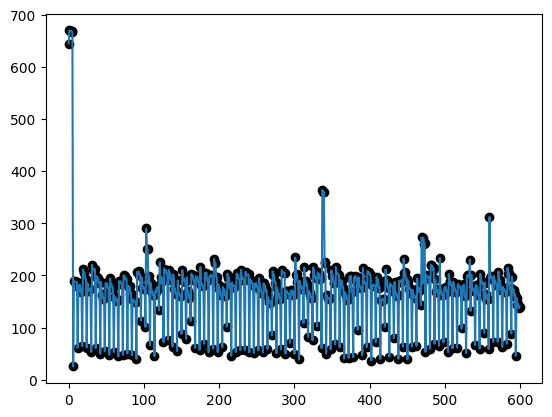

In [20]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

## sJIVE-predictionを実行

In [21]:
times_tes=1000
threshold_tes=1.0 

In [25]:
erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
    X_1_test,X_2_test,y_test,U_1_best,U_2_best,W_1_best,W_2_best,theta_1_best,theta_21_best,theta_22_best,times_tes,threshold_tes
)



100%|██████████| 1000/1000 [00:00<00:00, 8121.59it/s]


In [26]:
erro_tes_lis

[2007.4259911186746,
 1806.275472194141,
 1219.2437834682937,
 1147.4360027062103,
 1126.4888822087785,
 1095.9477633374845,
 1066.3316652523142,
 1055.811745776167,
 1042.588507888669,
 1026.894146816992,
 1020.1485559041629,
 1013.0557957576159,
 1003.1759140735984,
 998.3199727059341,
 993.9673750075453,
 987.0503698086243,
 983.3351890810674,
 980.4296411989775,
 975.2635590932559,
 972.3176426050561,
 970.2674354089936,
 966.2419635561405,
 963.8504122704601,
 962.3441978106646,
 959.1103403631198,
 957.1354518186099,
 955.992981661434,
 953.3331622861915,
 951.6805112297761,
 950.7905802741302,
 948.5609943118598,
 947.1627659360565,
 946.4536374123563,
 944.5551783103518,
 943.3610371578867,
 942.7848284518504,
 941.1469483267936,
 940.1186072240412,
 939.6424383485582,
 938.2135607868001,
 937.321343646393,
 936.9220666101022,
 935.6636114272092,
 934.8841712075691,
 934.5451175296091,
 933.4276404726949,
 932.7423855381764,
 932.4513019502117,
 931.4519278039957,
 930.84590309

<function matplotlib.pyplot.show(close=None, block=None)>

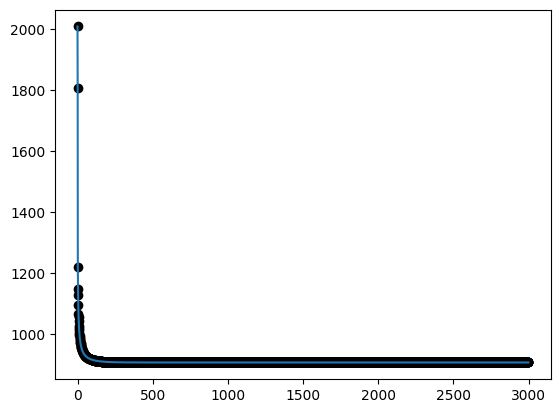

In [27]:
plt.plot(erro_tes_lis)
plt.scatter(range(len(erro_tes_lis)),erro_tes_lis,color="black")
plt.show

In [28]:
erro_result/50

0.8587601050441219

In [29]:
y_new

array([[ 0.02195022,  0.06113816, -0.01123287,  0.14556566, -0.03852292,
        -0.06669204,  0.04877766, -0.05662055,  0.01852199,  0.0698708 ,
         0.15155663,  0.04277054, -0.05116208,  0.0136892 , -0.03185938,
         0.01323328,  0.07488572, -0.05079785,  0.08020551,  0.08828396,
         0.018366  ,  0.21062706, -0.02684257, -0.09461903, -0.05616371,
         0.00918589,  0.06583966,  0.04604371, -0.00856741, -0.03463154,
         0.0830073 , -0.05938128,  0.06873507, -0.02825974,  0.08157716,
        -0.00140369,  0.00217505,  0.05786277,  0.00563604, -0.1167921 ,
        -0.02157128, -0.03721751, -0.00643768, -0.0636502 , -0.05032463,
         0.04855278, -0.10375285,  0.10894357,  0.0420923 , -0.00746189]])

In [31]:
y_test

array([[-1.22619536,  0.16590536,  0.71811915,  0.45367155,  0.20858063,
         0.26706706,  0.80235394, -0.88983051, -0.40627174, -1.06758079,
         0.69463927, -0.93321508, -1.11978866, -0.61175551, -0.34200523,
        -0.65795847, -0.87524679, -0.88235584, -2.00318722,  1.08033508,
        -1.37599093, -1.39043549, -0.80395595,  0.02509188,  0.5651291 ,
        -0.63455759,  0.7361993 , -0.35093397,  0.49328257,  1.64692777,
         0.28576516,  1.17907903,  1.2535085 , -0.29123148, -1.14166153,
         0.07436049,  0.21901191, -0.91921714, -1.8385019 , -1.84192016,
        -0.27939324, -0.37668045,  0.91109187,  0.9673831 ,  1.05099089,
         0.88472304,  1.16769274,  0.50672669, -0.19292418,  0.45874206]])

In [33]:
np.linalg.norm(y_test-y_new)**2

42.938005252206096

# pcLasso+sJIVEの実装

## ハイパーパラメータの決定


In [12]:
k = 5
kf = KFold(n_splits=k)

times=10
threshold=100.0

times_tes=10
threshold_tes=100.0 

In [13]:
def objective_2(trial):
    #ハイパーパラメータを定義
    eta=trial.suggest_float("eta",0.01,0.99)
    r_J=trial.suggest_int("r_J",1,20)
    r_1=trial.suggest_int("r_1",1,20)
    r_2=trial.suggest_int("r_2",1,20)
    gamma_1=trial.suggest_float("gamma_1",0.1,10.0)
    gamma_21=trial.suggest_float("gamma_21",0.1,10.0)
    gamma_22=trial.suggest_float("gamma_22",0.1,10.0)

    accuracy_pcLasso_sJIVE_cv=function.cv_pcLasso_sJIVE(df_tra,eta=eta,r_J=r_J,r_1=r_1,r_2=r_2,gamma_1=gamma_1,gamma_21=gamma_21,gamma_22=gamma_22,p_1=p_1,p_2=p_2,times=times,threshold=threshold,times_tes=times_tes,threshold_tes=threshold_tes)

    return accuracy_pcLasso_sJIVE_cv

In [14]:
study_2=optuna.create_study(direction="minimize")
study_2.optimize(objective_2,n_trials=100)

[I 2023-05-01 19:07:19,678] A new study created in memory with name: no-name-e281dc97-8592-44a2-a2b6-89f56f774f45
100%|██████████| 10/10 [00:00<00:00, 2361.79it/s]
[I 2023-05-01 19:07:20,992] Trial 0 finished with value: 100.0 and parameters: {'eta': 0.9084831491988042, 'r_J': 1, 'r_1': 8, 'r_2': 1, 'gamma_1': 6.991277917808929, 'gamma_21': 5.365647045820564, 'gamma_22': 5.146986446989635}. Best is trial 0 with value: 100.0.
100%|██████████| 10/10 [00:00<00:00, 693.69it/s]
[I 2023-05-01 19:07:21,928] Trial 1 finished with value: 100.0 and parameters: {'eta': 0.9573275122671381, 'r_J': 12, 'r_1': 11, 'r_2': 3, 'gamma_1': 2.8802606396357557, 'gamma_21': 2.170562040819781, 'gamma_22': 4.592263439637839}. Best is trial 0 with value: 100.0.
100%|██████████| 10/10 [00:00<00:00, 2522.74it/s]
[I 2023-05-01 19:07:23,380] Trial 2 finished with value: 100.0 and parameters: {'eta': 0.24250112356863165, 'r_J': 7, 'r_1': 12, 'r_2': 9, 'gamma_1': 6.377344698999901, 'gamma_21': 0.5743892969000969, 'ga

In [15]:
best_params_2 = study_2.best_params
best_accuracy_2 = study_2.best_value
print(f'Best parameters: {best_params_2}')
print(f"The best value is :{best_accuracy_2}")

Best parameters: {'eta': 0.9084831491988042, 'r_J': 1, 'r_1': 8, 'r_2': 1, 'gamma_1': 6.991277917808929, 'gamma_21': 5.365647045820564, 'gamma_22': 5.146986446989635}
The best value is :100.0


In [20]:
eta_2=best_params_2["eta"]
r_J_2=best_params_2["r_J"]
r_1_2=best_params_2["r_1"]
r_2_2=best_params_2["r_2"]
gamma_1=best_params_2["gamma_1"]
gamma_21=best_params_2["gamma_21"]
gamma_22=best_params_2["gamma_22"]
times_2=100
threshold_2=10.0

In [21]:
erro_lis,number_best,erro_best,S_J_best,U_1_best,U_2_best,theta_1_best,S_1_best,W_1_best,theta_21_best,S_2_best,W_2_best,theta_22_best,hat_X_y_best=function.pcLasso_sJIVE(
    eta=eta_2,times=times_2,r_J=r_J_2,r_1=r_1_2,r_2=r_2_2,gamma_1=gamma_1,gamma_21=gamma_21,gamma_22=gamma_22,X_1_or=X_1_original,X_2_or=X_2_original,y_or=y_original,threshold=threshold_2
)

100%|██████████| 100/100 [00:02<00:00, 48.95it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

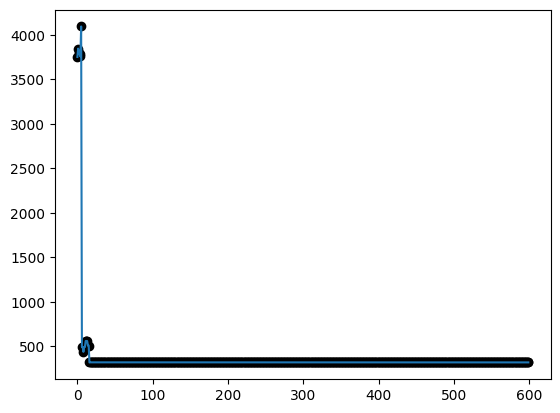

In [22]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

In [23]:
times_tes=1000
threshold_tes=1.0 

In [24]:
erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
    X_1_test,X_2_test,y_test,U_1_best,U_2_best,W_1_best,W_2_best,theta_1_best,theta_21_best,theta_22_best,times_tes,threshold_tes
)

100%|██████████| 1000/1000 [00:00<00:00, 11422.05it/s]


In [25]:
np.linalg.norm(y_test-y_new)**2

61.20095967981738